<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(ResNet)cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/AnandDaksh/AnandDaksh/blob/main/small_images.jpg?raw=1" />

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

KeyboardInterrupt: 

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

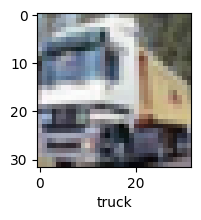

In [ ]:
plot_sample(X_train, y_train, 1)

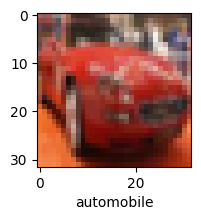

In [ ]:
plot_sample(X_train, y_train, 5)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 161s 102ms/step - loss: 1.8134 - accuracy: 0.3542
Epoch 2/2
1563/1563 [==============================] - 162s 104ms/step - loss: 1.6214 - accuracy: 0.4287


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:

y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

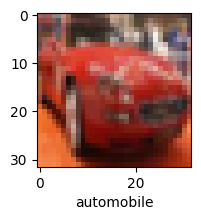

In [12]:
plot_sample(X_train, y_train, 5)

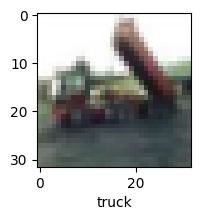

In [13]:
plot_sample(X_train, y_train, 2)

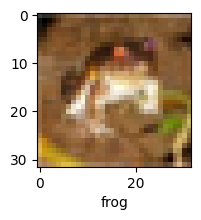

In [32]:
plot_sample(X_train, y_train, 0)

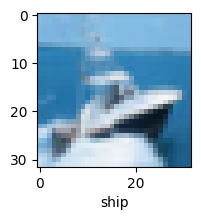

In [33]:
plot_sample(X_train, y_train, 8)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
!pip install tensorflow matplotlib seaborn

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

In [17]:
# Assuming you have X_train, y_train, X_test, and y_test loaded appropriately

# Load the ResNet50 model without the top classification layer and with pretrained weights on imagenet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [18]:
# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

In [19]:
# Define your custom classification layers
x = layers.Flatten()(resnet.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

In [20]:
# Create the model
resnet_model = models.Model(resnet.input, output)

In [21]:
# Compile the model
resnet_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [22]:
# Print model summary
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [34]:
# Fit the model
history = resnet_model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
1563/1563 [==============================] - 247s 158ms/step - loss: 1.5857 - accuracy: 0.4343 - val_loss: 1.5958 - val_accuracy: 0.4333
Epoch 2/60
1563/1563 [==============================] - 245s 157ms/step - loss: 1.5835 - accuracy: 0.4358 - val_loss: 1.5971 - val_accuracy: 0.4288
Epoch 3/60
1563/1563 [==============================] - 247s 158ms/step - loss: 1.5854 - accuracy: 0.4340 - val_loss: 1.5789 - val_accuracy: 0.4402
Epoch 4/60
1563/1563 [==============================] - 245s 156ms/step - loss: 1.5823 - accuracy: 0.4377 - val_loss: 1.5735 - val_accuracy: 0.4435
Epoch 5/60
1563/1563 [==============================] - 244s 156ms/step - loss: 1.5815 - accuracy: 0.4372 - val_loss: 1.5765 - val_accuracy: 0.4400
Epoch 6/60
1563/1563 [==============================] - 247s 158ms/step - loss: 1.5773 - accuracy: 0.4399 - val_loss: 1.5889 - val_accuracy: 0.4363
Epoch 7/60
1563/1563 [==============================] - 249s 159ms/step - loss: 1.5800 - accuracy: 0.4370 - val_

In [35]:
# Evaluate the model
resnet_model.evaluate(X_test, y_test)

313/313 [==============================] - 40s 126ms/step - loss: 1.5314 - accuracy: 0.4605


[1.5314350128173828, 0.46050000190734863]

In [36]:
# Make predictions on the test data
y_pred = np.argmax(resnet_model.predict(X_test), axis=-1)

313/313 [==============================] - 40s 127ms/step


In [37]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [38]:
# Calculate accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

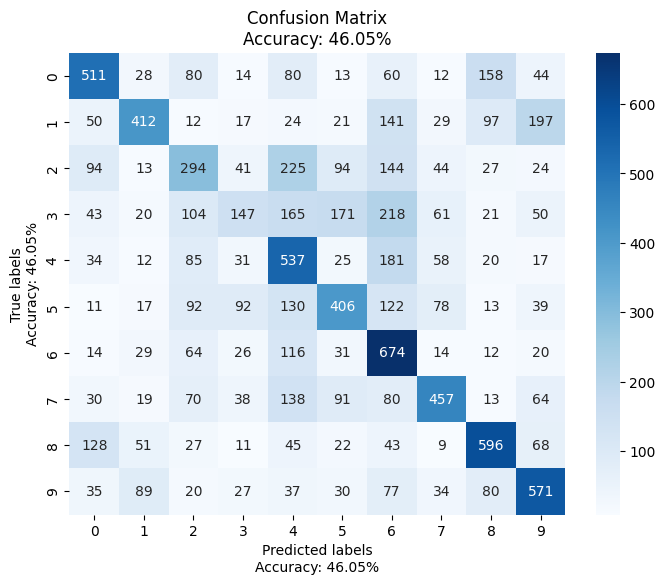

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated 'conf_matrix' and 'accuracy'

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()


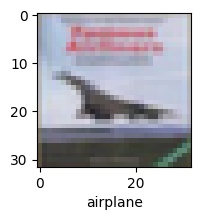

In [40]:
# Plot a sample image from the test set
plot_sample(X_test, y_test, 3)

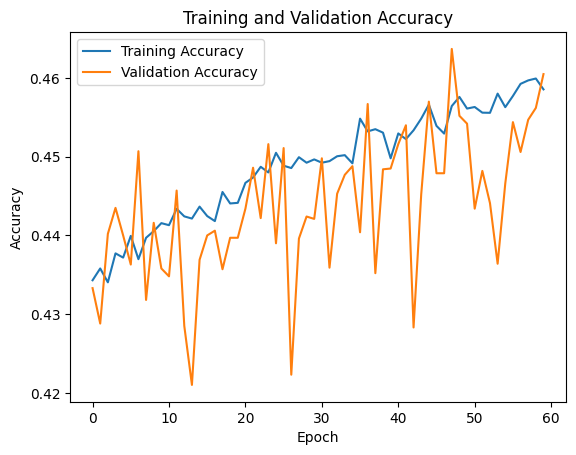

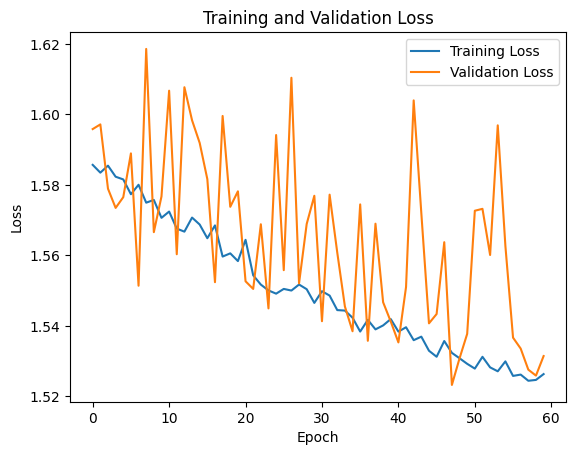

In [42]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [41]:
# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print(predicted_class_name)


ship
